 # S11 总决赛Pick分析

/var/folders/bq/7xc8v0_n0xvdrksns142rb880000gn/T/ipykernel_49743/2304716978.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rate', y='Hero', data=results_df, ax=ax, palette='viridis')
/var/folders/bq/7xc8v0_n0xvdrksns142rb880000gn/T/ipykernel_49743/2304716978.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rate', y='Hero', data=results_df, ax=ax, palette='viridis')
/var/folders/bq/7xc8v0_n0xvdrksns142rb880000gn/T/ipykernel_49743/2304716978.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rate', y='Hero', data=results_d

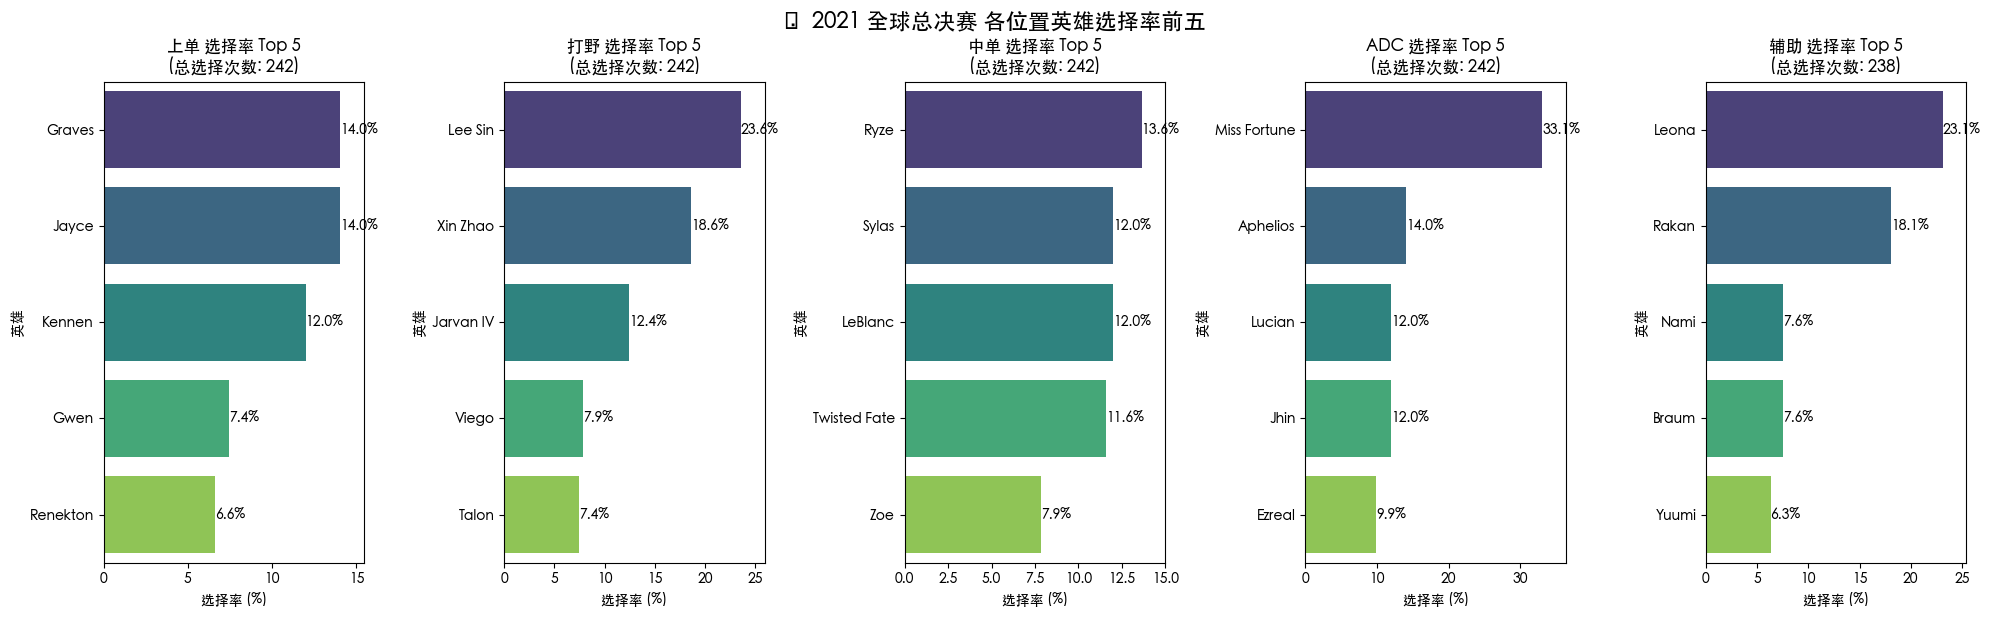


--- 详细统计结果 ---

### 上单 英雄选择率 Top 5
| Hero     |   Picks | Rate   |
|:---------|--------:|:-------|
| Graves   |      34 | 14.0%  |
| Jayce    |      34 | 14.0%  |
| Kennen   |      29 | 12.0%  |
| Gwen     |      18 | 7.4%   |
| Renekton |      16 | 6.6%   |

### 打野 英雄选择率 Top 5
| Hero      |   Picks | Rate   |
|:----------|--------:|:-------|
| Lee Sin   |      57 | 23.6%  |
| Xin Zhao  |      45 | 18.6%  |
| Jarvan IV |      30 | 12.4%  |
| Viego     |      19 | 7.9%   |
| Talon     |      18 | 7.4%   |

### 中单 英雄选择率 Top 5
| Hero         |   Picks | Rate   |
|:-------------|--------:|:-------|
| Ryze         |      33 | 13.6%  |
| Sylas        |      29 | 12.0%  |
| LeBlanc      |      29 | 12.0%  |
| Twisted Fate |      28 | 11.6%  |
| Zoe          |      19 | 7.9%   |

### ADC 英雄选择率 Top 5
| Hero         |   Picks | Rate   |
|:-------------|--------:|:-------|
| Miss Fortune |      80 | 33.1%  |
| Aphelios     |      34 | 14.0%  |
| Lucian       |      29 | 12.0%  |
| Jhin         |

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 定义位置顺序
POSITIONS = ['上单', '打野', '中单', 'ADC', '辅助']
FILE_NAME = "2021_worlds_kda_final.csv"

plt.rcParams['font.family'] = 'Heiti TC'  # 替换为你选择的字体

def analyze_and_plot_champion_picks(file_path, positions):
    """
    加载数据，分配位置，统计英雄选择次数和选择率，并绘制前五的柱状图。
    """
    try:
        # 1. 加载数据
        df = pd.read_csv(file_path)

        # 2. 清理和筛选数据
        # 移除 'champion' 列为空的行，这是根据比赛数据的结构决定的
        df_filtered = df.dropna(subset=['champion', 'player']).copy()

        if df_filtered.empty:
            print("🚨 警告: 过滤后没有有效的英雄选择数据。")
            return

        # 3. 分配位置
        # 根据 'gameid' 分组，对每场比赛的数据行进行编号，并根据编号分配位置
        # (index - 1) % len(positions) 可以实现 0->上单, 1->打野, ..., 4->辅助, 5->上单...
        df_filtered['position_index'] = df_filtered.groupby('gameid').cumcount()
        df_filtered['position'] = df_filtered['position_index'].apply(lambda x: positions[x % len(positions)])

        # 4. 统计分析
        all_plots = []
        
        # 创建图形和子图
        fig, axes = plt.subplots(ncols=len(positions), nrows=1, figsize=(4 * len(positions), 6))
        
        # 遍历每个位置
        for i, pos in enumerate(positions):
            # 筛选该位置的数据
            df_pos = df_filtered[df_filtered['position'] == pos]
            
            # 计算该位置的英雄总选择次数 (即该位置的总比赛场次 * 队伍数)
            total_picks = len(df_pos)
            
            if total_picks == 0:
                print(f"位置 {pos} 没有数据。")
                continue

            # 统计英雄选择次数
            pick_counts = df_pos['champion'].value_counts()
            
            # 选取选择次数前五的英雄
            top_5_picks = pick_counts.head(5)
            
            # 计算选择率 (%)
            top_5_rate = (top_5_picks / total_picks) * 100
            
            # 将结果存储为 DataFrame 用于后续显示和绘图
            results_df = pd.DataFrame({
                'Hero': top_5_picks.index,
                'Picks': top_5_picks.values,
                'Rate': top_5_rate.values
            })
            all_plots.append((pos, results_df))
            
            # 绘制柱状图
            ax = axes[i]
            sns.barplot(x='Rate', y='Hero', data=results_df, ax=ax, palette='viridis')
            
            # 添加选择率百分比标签
            for index, row in results_df.iterrows():
                ax.text(row['Rate'], index, f'{row["Rate"]:.1f}%', va='center', ha='left')
            
            # 设置图表标题和标签
            ax.set_title(f'{pos} 选择率 Top 5\n(总选择次数: {total_picks})', fontsize=12)
            ax.set_xlabel('选择率 (%)', fontsize=10)
            ax.set_ylabel('英雄', fontsize=10)
            ax.set_xlim(0, max(top_5_rate) * 1.1) # 调整x轴范围以容纳标签

        # 调整子图布局
        plt.tight_layout()
        plt.suptitle("🏆 2021 全球总决赛 各位置英雄选择率前五", y=1.02, fontsize=16)
        plt.show()

        # 5. 打印汇总表格 (可选)
        print("\n--- 详细统计结果 ---")
        for pos, df_res in all_plots:
            print(f"\n### {pos} 英雄选择率 Top 5")
            # 格式化 Rate 列为百分比字符串
            df_res['Rate'] = df_res['Rate'].apply(lambda x: f'{x:.1f}%')
            print(df_res.to_markdown(index=False))

    except FileNotFoundError:
        print(f"❌ 错误: 文件未找到 - {file_path}")
    except Exception as e:
        print(f"❌ 发生错误: {e}")

# 执行函数
analyze_and_plot_champion_picks(FILE_NAME, POSITIONS)

# 路人和选手混合选择率

In [5]:
import pandas as pd
import numpy as np
from tabulate import tabulate # 假设您已安装 tabulate

FILE_NAME = "../games_champion.csv"
POSITIONS_CN = ['上单', '打野', '中单', 'ADC', '辅助']

def analyze_pick_rate_and_win_rate(file_path, positions):
    """
    计算 games_champion.csv 文件中各位置英雄的选择率和胜率。
    """
    try:
        # 1. 加载数据
        df = pd.read_csv(file_path)
        
        # 统计总局数
        total_games = len(df)
        print(f"📊 数据加载完成，总游戏局数: {total_games}\n")

        # 2. 数据重构 (将宽表转换为长表)
        
        # 存储重构后的数据
        records = []
        
        # 遍历每个位置 (1 到 5)
        for i, pos_cn in enumerate(positions, 1):
            win_col = f'win{i}'
            lose_col = f'lose{i}'
            
            # 胜利方记录
            win_records = df[[win_col]].rename(columns={win_col: 'champion'})
            win_records['position'] = pos_cn
            win_records['result'] = 1  # 获胜
            records.append(win_records)
            
            # 失败方记录
            lose_records = df[[lose_col]].rename(columns={lose_col: 'champion'})
            lose_records['position'] = pos_cn
            lose_records['result'] = 0  # 失败
            records.append(lose_records)

        # 合并所有记录
        df_long = pd.concat(records, ignore_index=True)
        
        # 移除英雄名为空的行
        df_long.dropna(subset=['champion'], inplace=True)
        
        # 3. 统计计算
        
        # 按位置和英雄分组
        grouped = df_long.groupby(['position', 'champion'])
        
        # 计算：总选择次数 (Picks) 和 获胜次数 (Wins)
        stats = grouped.agg(
            Picks=('champion', 'size'),
            Wins=('result', 'sum')
        )
        
        # 计算：选择率 (Pick Rate) 和 胜率 (Win Rate)
        stats['Pick Rate'] = (stats['Picks'] / total_games) * 100
        stats['Win Rate'] = (stats['Wins'] / stats['Picks']) * 100
        
        # 4. 格式化和展示结果
        
        final_results = {}
        print("--- 各位置英雄选择率与胜率分析 ---")

        for pos in positions:
            # 筛选该位置的数据
            df_pos = stats.loc[pos].sort_values(by='Picks', ascending=False)
            
            # 选取选择率或次数最高的前 10 个英雄进行展示
            top_10 = df_pos.head(10).reset_index()
            
            # 格式化百分比
            top_10['Pick Rate'] = top_10['Pick Rate'].apply(lambda x: f'{x:.1f}%')
            top_10['Win Rate'] = top_10['Win Rate'].apply(lambda x: f'{x:.1f}%')
            
            # 重命名列以适应中文输出
            top_10.columns = ['英雄', '选择次数', '获胜次数', '选择率 (局数%)', '胜率 (Picks%)']
            final_results[pos] = top_10
            
            # 使用 tabulate 打印结果
            print(f"\n### 位置: {pos} (总局数={total_games})")
            print(tabulate(top_10, headers='keys', tablefmt='fancy_grid', showindex=False))

        return final_results

    except FileNotFoundError:
        print(f"❌ 错误: 文件未找到 - {file_path}")
        return None
    except KeyError as e:
        print(f"❌ 错误: 文件中的列名不匹配。请确保文件包含 win1, win2, ..., lose5 等列。具体缺失: {e}")
        return None
    except Exception as e:
        print(f"❌ 发生未知错误: {e}")
        return None

# 执行分析
results = analyze_pick_rate_and_win_rate(FILE_NAME, POSITIONS_CN)

📊 数据加载完成，总游戏局数: 4702

--- 各位置英雄选择率与胜率分析 ---

### 位置: 上单 (总局数=4702)
╒════════════╤════════════╤════════════╤══════════════════╤═════════════════╕
│ 英雄       │   选择次数 │   获胜次数 │ 选择率 (局数%)   │ 胜率 (Picks%)   │
╞════════════╪════════════╪════════════╪══════════════════╪═════════════════╡
│ 青钢影     │        725 │        373 │ 15.4%            │ 51.4%           │
├────────────┼────────────┼────────────┼──────────────────┼─────────────────┤
│ 法外狂徒   │        660 │        328 │ 14.0%            │ 49.7%           │
├────────────┼────────────┼────────────┼──────────────────┼─────────────────┤
│ 暗裔剑魔   │        660 │        331 │ 14.0%            │ 50.2%           │
├────────────┼────────────┼────────────┼──────────────────┼─────────────────┤
│ 无双剑姬   │        554 │        252 │ 11.8%            │ 45.5%           │
├────────────┼────────────┼────────────┼──────────────────┼─────────────────┤
│ 刀锋舞者   │        550 │        271 │ 11.7%            │ 49.3%           │
├────────────┼────────────┼──────

📊 数据加载完成，总游戏局数: 4702
💾 正在将统计结果保存到 Excel 文件: champion_position_stats_noob_pro.xlsx...
✅ 结果保存成功！


/var/folders/bq/7xc8v0_n0xvdrksns142rb880000gn/T/ipykernel_49743/3004794427.py:139: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Heiti TC.
  plt.tight_layout(rect=[0, 0, 1, 0.94])
/opt/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Heiti TC.
  fig.canvas.print_figure(bytes_io, **kw)


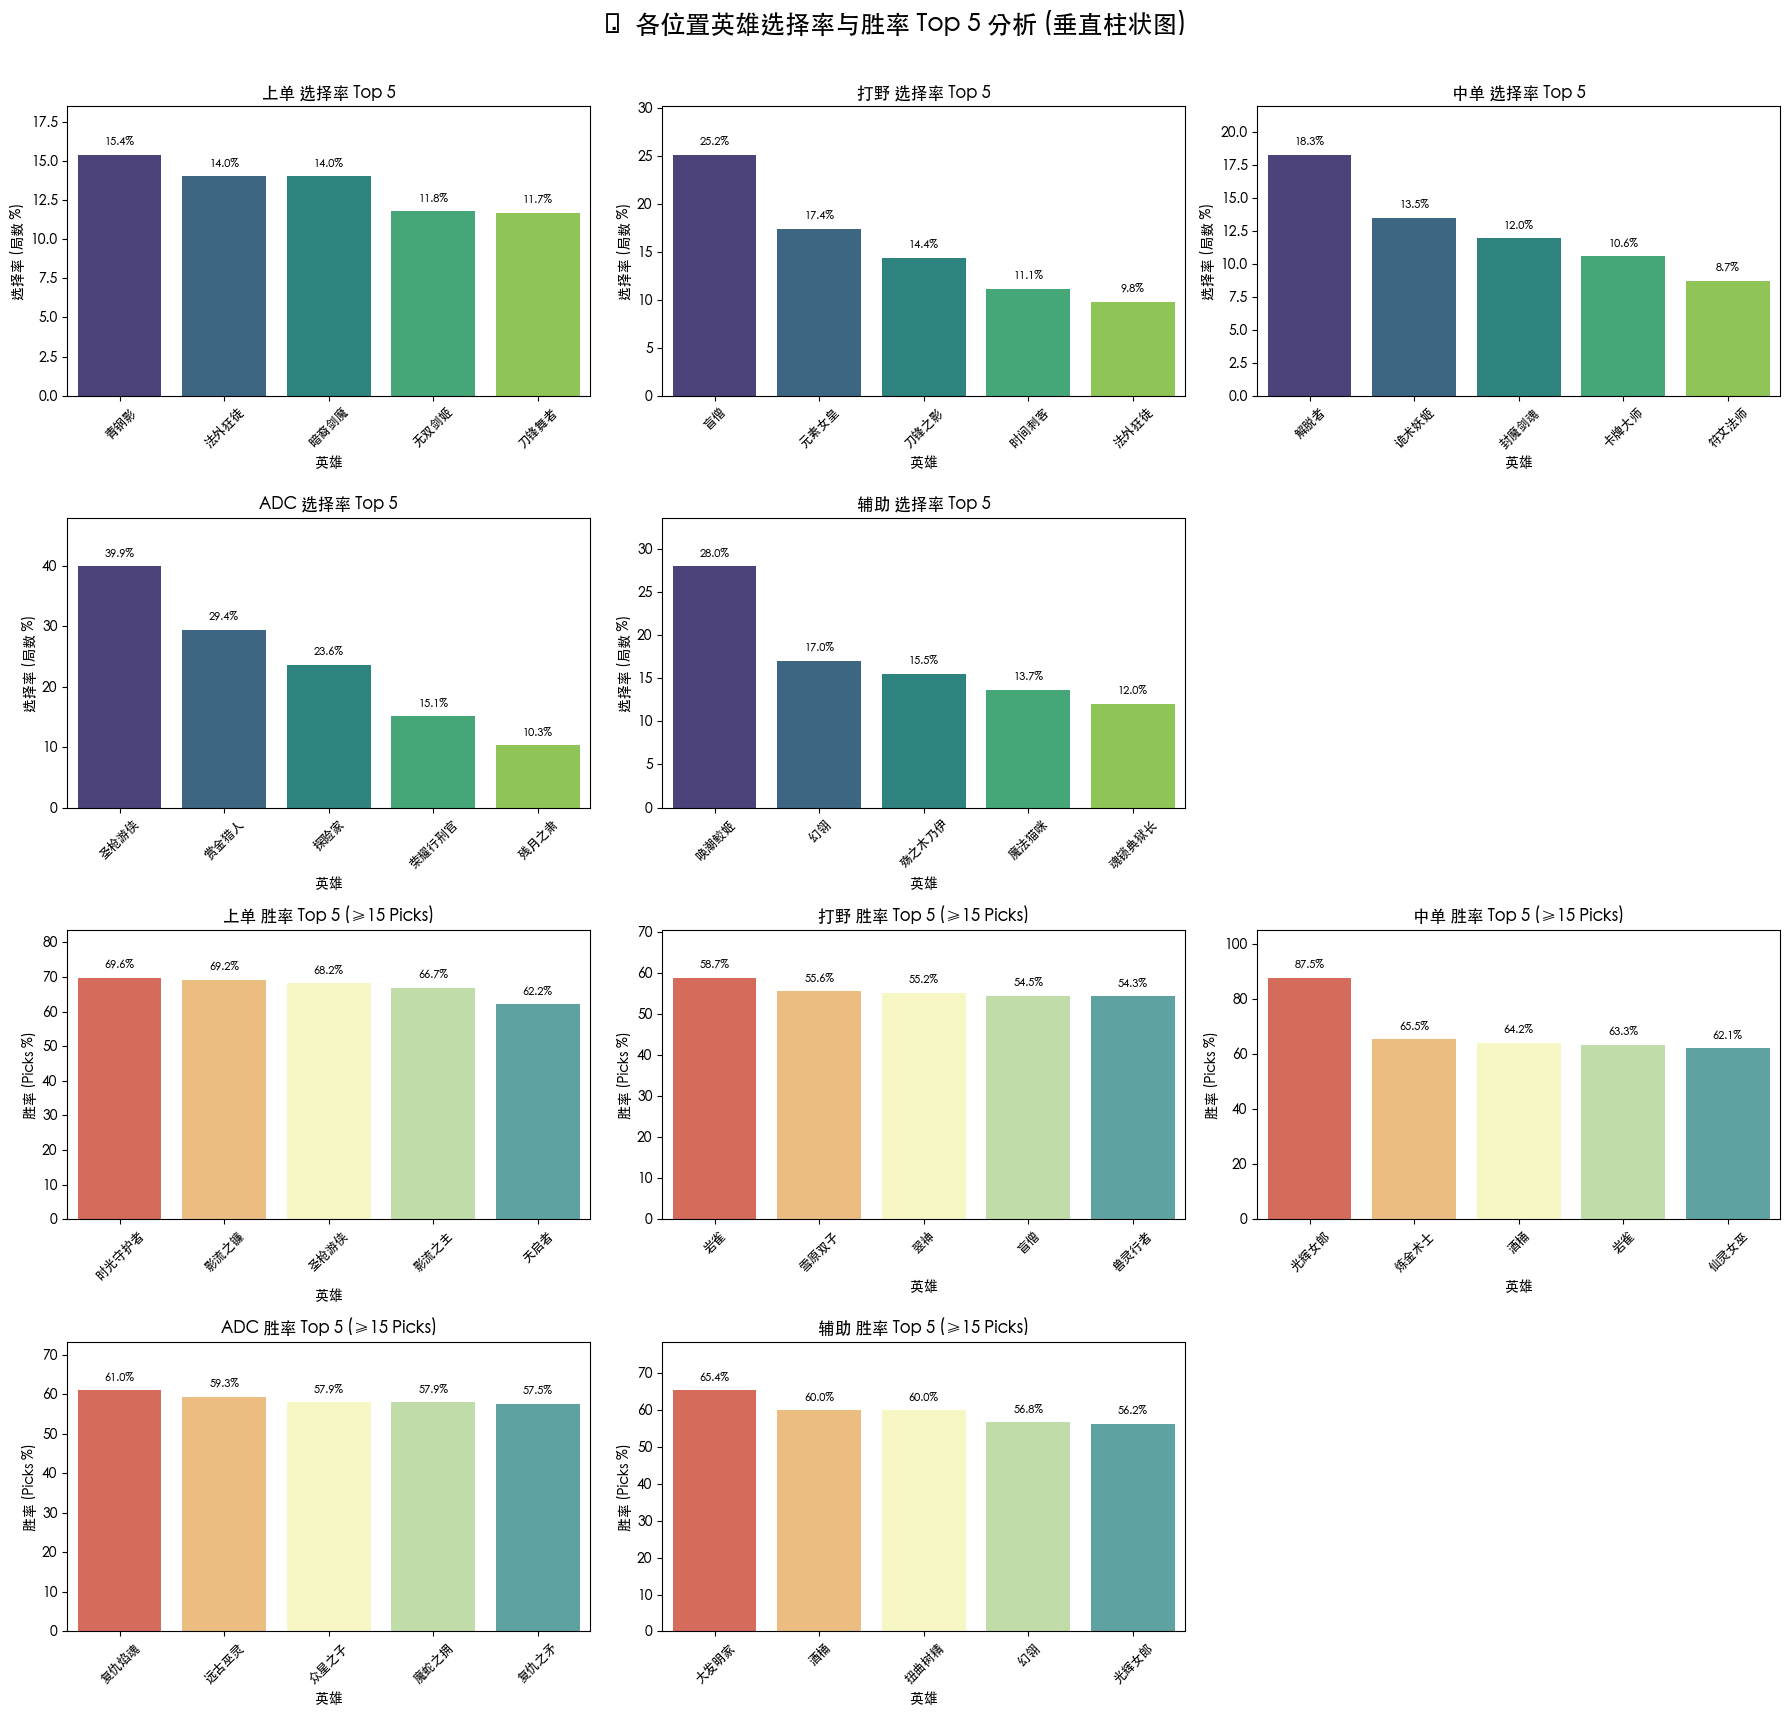

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# 文件名和位置定义
FILE_NAME = "../games_champion.csv"
OUTPUT_EXCEL_FILE = "champion_position_stats_noob_pro.xlsx" # 新增的输出文件名
POSITIONS_CN = ['上单', '打野', '中单', 'ADC', '辅助']

# 设置 Matplotlib 以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False 

def analyze_and_save_to_excel(file_path, positions, output_excel_path):
    """
    计算各位置英雄的选择率和胜率，并保存到包含多个工作表的 Excel 文件中。
    """
    try:
        # 1. 数据加载和处理 (与之前相同)
        df = pd.read_csv(file_path)
        total_games = len(df)
        print(f"📊 数据加载完成，总游戏局数: {total_games}")

        records = []
        for i, pos_cn in enumerate(positions, 1):
            # 胜利方记录
            win_records = df[[f'win{i}']].rename(columns={f'win{i}': 'champion'})
            win_records['position'] = pos_cn
            win_records['result'] = 1  
            records.append(win_records)
            
            # 失败方记录
            lose_records = df[[f'lose{i}']].rename(columns={f'lose{i}': 'champion'})
            lose_records['position'] = pos_cn
            lose_records['result'] = 0 
            records.append(lose_records)

        df_long = pd.concat(records, ignore_index=True)
        df_long.dropna(subset=['champion'], inplace=True)
        
        # 3. 统计计算
        grouped = df_long.groupby(['position', 'champion'])
        stats = grouped.agg(
            Picks=('champion', 'size'),
            Wins=('result', 'sum')
        )
        stats['Pick Rate'] = (stats['Picks'] / total_games) * 100
        stats['Win Rate'] = (stats['Wins'] / stats['Picks']) * 100
        
        # 将 Pick Rate 和 Win Rate 格式化为百分比字符串（方便 Excel 查看）
        stats['Pick Rate (%)'] = stats['Pick Rate'].apply(lambda x: f'{x:.2f}%')
        stats['Win Rate (%)'] = stats['Win Rate'].apply(lambda x: f'{x:.2f}%')
        
        # 4. 保存结果到 Excel 文件
        print(f"💾 正在将统计结果保存到 Excel 文件: {output_excel_path}...")
        
        # 使用 ExcelWriter 对象写入多个工作表
        with pd.ExcelWriter(output_excel_path, engine='xlsxwriter') as writer:
            
            for pos in positions:
                # 筛选该位置的数据
                df_pos = stats.loc[pos].copy()
                # 按选择次数降序排列
                df_pos = df_pos.sort_values(by='Picks', ascending=False)
                
                # 选取要保存的列
                df_save = df_pos[['Picks', 'Wins', 'Pick Rate (%)', 'Win Rate (%)']]
                
                # 写入工作表，工作表名称为位置名
                df_save.to_excel(writer, sheet_name=f'{pos} ({df_pos["Picks"].sum()} Picks)')
                
            print("✅ 结果保存成功！")

        # 5. 绘制图表 (保留绘图功能，方便在 Notebook 中查看)
        
        # 绘图部分代码 (与之前垂直柱状图代码相同，仅为确保完整性，不重复详细注释)
        fig, axes = plt.subplots(nrows=4, ncols=3, 
                                 figsize=(18, 18), 
                                 sharex=False)
        fig.suptitle("🏆 各位置英雄选择率与胜率 Top 5 分析 (垂直柱状图)", fontsize=18, y=0.95)
        
        MIN_PICKS_THRESHOLD = 15 
        pick_map = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1)] 
        win_map = [(2, 0), (2, 1), (2, 2), (3, 0), (3, 1)] 

        axes[1, 2].set_visible(False)
        axes[3, 2].set_visible(False)
        
        for i, pos in enumerate(positions):
            df_pos = stats.loc[pos].reset_index()
            df_pos_filtered = df_pos[df_pos['Picks'] >= MIN_PICKS_THRESHOLD].copy()

            # --- 4.1. 选择率 Top 5 绘图 ---
            df_pick_top5 = df_pos.sort_values(by='Pick Rate', ascending=False).head(5)
            r, c = pick_map[i]
            ax_pick = axes[r, c]
            
            sns.barplot(x='champion', y='Pick Rate', data=df_pick_top5, ax=ax_pick, 
                        palette='viridis', hue='champion', legend=False, dodge=False)
            ax_pick.set_title(f'{pos} 选择率 Top 5', fontsize=12)
            ax_pick.set_xlabel('英雄', fontsize=10)
            ax_pick.set_ylabel('选择率 (局数 %)', fontsize=10)
            ax_pick.tick_params(axis='x', rotation=45, labelsize=9) 
            
            for p in ax_pick.patches:
                ax_pick.annotate(f"{p.get_height():.1f}%", 
                                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                                 ha = 'center', va = 'center', 
                                 xytext = (0, 9), textcoords = 'offset points', fontsize=8)
            
            max_pick_rate = df_pick_top5['Pick Rate'].max()
            ax_pick.set_ylim(0, max_pick_rate * 1.2)


            # --- 4.2. 胜率 Top 5 绘图 ---
            df_win_top5 = df_pos_filtered.sort_values(by='Win Rate', ascending=False).head(5)
            r, c = win_map[i]
            ax_win = axes[r, c]
            
            sns.barplot(x='champion', y='Win Rate', data=df_win_top5, ax=ax_win, 
                        palette='Spectral', hue='champion', legend=False, dodge=False)
            ax_win.set_title(f'{pos} 胜率 Top 5 (≥{MIN_PICKS_THRESHOLD} Picks)', fontsize=12)
            ax_win.set_xlabel('英雄', fontsize=10)
            ax_win.set_ylabel('胜率 (Picks %)', fontsize=10)
            ax_win.tick_params(axis='x', rotation=45, labelsize=9)
            
            for p in ax_win.patches:
                ax_win.annotate(f"{p.get_height():.1f}%", 
                                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                                 ha = 'center', va = 'center', 
                                 xytext = (0, 9), textcoords = 'offset points', fontsize=8)
            
            max_win_rate = df_win_top5['Win Rate'].max()
            ax_win.set_ylim(0, max_win_rate * 1.2)

        # 6. 显示图表 (Jupyter Notebook 中)
        plt.tight_layout(rect=[0, 0, 1, 0.94])
        plt.show()


    except FileNotFoundError:
        print(f"❌ 错误: 文件未找到 - {file_path}")
    except KeyError as e:
        print(f"❌ 错误: 文件中的列名不匹配。请确保文件包含 win1, win2, ..., lose5 等列。具体缺失: {e}")
    except Exception as e:
        print(f"❌ 发生未知错误: {e}")

# 执行分析和保存
analyze_and_save_to_excel(FILE_NAME, POSITIONS_CN, OUTPUT_EXCEL_FILE)

# 单排数据 只计算职业选手

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 文件名和位置定义
FILE_NAME = "games_player_champion_combined.csv"
OUTPUT_EXCEL_FILE = "pro_player_champion_stats.xlsx" 
POSITIONS_CN = ['上单', '打野', '中单', 'ADC', '辅助']

# 设置 Matplotlib 以支持中文显示 (Jupyter环境常用字体)
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False 

def analyze_pro_player_stats_fixed(file_path, positions, output_excel_path):
    """
    仅计算 games_player_champion_combined.csv 中职业选手的英雄选择率和胜率，
    并保存到 Excel 文件，同时修复工作表名称的非法字符错误。
    """
    try:
        # 1. 加载数据
        df = pd.read_csv(file_path)
        
        # 2. 数据重构和解析 (Player_Champion -> Player, Champion)
        records = []
        for i, pos_cn in enumerate(positions, 1):
            win_col = f'win{i}'
            lose_col = f'lose{i}'
            
            # --- 胜利方解析 ---
            win_df = df[[win_col]].dropna().copy()
            win_df[['player', 'champion']] = win_df[win_col].str.split('_', n=1, expand=True)
            win_df['position'] = pos_cn
            win_df['result'] = 1  # 获胜
            records.append(win_df[['player', 'champion', 'position', 'result']])
            
            # --- 失败方解析 ---
            lose_df = df[[lose_col]].dropna().copy()
            lose_df[['player', 'champion']] = lose_df[lose_col].str.split('_', n=1, expand=True)
            lose_df['position'] = pos_cn
            lose_df['result'] = 0  # 失败
            records.append(lose_df[['player', 'champion', 'position', 'result']])

        df_long = pd.concat(records, ignore_index=True)
        df_filtered = df_long.dropna(subset=['player', 'champion']).copy()
        
        total_pro_picks = len(df_filtered)
        print(f"✅ 过滤完成，总计职业选手的英雄选择次数: {total_pro_picks}")

        # 3. 统计计算
        total_picks_by_pos = df_filtered.groupby('position')['champion'].count()
        grouped = df_filtered.groupby(['position', 'champion'])
        
        stats = grouped.agg(
            Picks=('champion', 'size'),
            Wins=('result', 'sum')
        ).reset_index()
        
        def calculate_pick_rate(row):
            pos = row['position']
            return (row['Picks'] / total_picks_by_pos.loc[pos]) * 100
        
        stats['Pick Rate'] = stats.apply(calculate_pick_rate, axis=1)
        stats['Win Rate'] = (stats['Wins'] / stats['Picks']) * 100
        
        stats['Pick Rate (%)'] = stats['Pick Rate'].apply(lambda x: f'{x:.2f}%')
        stats['Win Rate (%)'] = stats['Win Rate'].apply(lambda x: f'{x:.2f}%')
        
        stats.set_index(['position', 'champion'], inplace=True)

        # 4. 保存结果到 Excel 文件
        print(f"💾 正在将职业选手统计结果保存到 Excel 文件: {output_excel_path}...")
        
        with pd.ExcelWriter(output_excel_path, engine='xlsxwriter') as writer:
            
            for pos in positions:
                df_pos = stats.loc[pos].copy().reset_index()
                df_pos = df_pos.sort_values(by='Picks', ascending=False)
                df_save = df_pos[['champion', 'Picks', 'Wins', 'Pick Rate (%)', 'Win Rate (%)']]
                
                total_pos_picks = total_picks_by_pos.loc[pos]
                
                # *** 关键修正: 移除工作表名称中的非法字符 `:` ***
                sheet_name = f'{pos} (Total Picks {total_pos_picks})'
                
                df_save.to_excel(writer, sheet_name=sheet_name, index=False)
                
            print("✅ 结果保存成功！")


    except FileNotFoundError:
        print(f"❌ 错误: 文件未找到 - {file_path}")
        return None
    except Exception as e:
        print(f"❌ 发生未知错误: {e}")
        return None

# 执行分析和保存
analyze_pro_player_stats_fixed(FILE_NAME, POSITIONS_CN, OUTPUT_EXCEL_FILE)

✅ 过滤完成，总计职业选手的英雄选择次数: 5237
💾 正在将职业选手统计结果保存到 Excel 文件: pro_player_champion_stats.xlsx...
✅ 结果保存成功！


# 两个 xslx分析

In [23]:
import pandas as pd
from tabulate import tabulate
import numpy as np

# --- 1. 定义文件名和工作表名称 (用于 pd.read_excel) ---
# 注意：请确保这两个文件与您的 Python 脚本在同一目录下
FILE_MIXED = "champion_position_stats_noob_pro.xlsx"
FILE_PRO = "pro_player_champion_stats.xlsx"

# 明确的工作表名称（假设您的表格名称与此一致）
SHEET_MAPPING = {
    '上单': {
        'mixed_sheet': '上单 (9401 Picks)',
        'pro_sheet': '上单 (Total Picks 1296)' # 需根据您的实际文件名 pro_player_champion_stats.xlsx 内的工作表名称来确定
    },
    '打野': {
        'mixed_sheet': '打野 (9404 Picks)',
        'pro_sheet': '打野 (Total Picks 1160)'
    },
    '中单': {
        'mixed_sheet': '中单 (9401 Picks)',
        'pro_sheet': '中单 (Total Picks 877)'
    },
    'ADC': {
        'mixed_sheet': 'ADC (9404 Picks)',
        'pro_sheet': 'ADC (Total Picks 1074)'
    },
    '辅助': {
        'mixed_sheet': '辅助 (9404 Picks)',
        'pro_sheet': '辅助 (Total Picks 830)'
    }
}

POSITIONS_CN = ['上单', '打野', '中单', 'ADC', '辅助']

# --- 2. 数据清洗和加载函数 ---

def clean_df(df):
    """数据清洗和标准化：清理列名，转换百分比为浮点数，并设置索引。"""
    if df.empty:
        return pd.DataFrame()

    df.columns = df.columns.str.strip()
    
    # 强制统一列名：champion, Picks, Wins, Pick Rate (%), Win Rate (%)
    # 注意：这里假设您的原始 Excel 表格结构是固定的五列数据
    try:
        # 假设第一列是 'champion'
        df.columns = ['champion', 'Picks', 'Wins', 'Pick Rate', 'Win Rate']
    except ValueError:
         print("⚠️ 警告: 数据列数不匹配，请检查 Excel 工作表格式。")
         return pd.DataFrame()
         
    # 转换百分比字符串 (如 '50.15%') 为浮点数 (50.15)
    for col in ['Pick Rate', 'Win Rate']:
        if col in df.columns:
            try:
                df[col] = df[col].astype(str).str.replace('%', '', regex=False).astype(float)
            except Exception:
                 # 如果已经是数字格式，则跳过
                 pass
        
    return df.set_index('champion')

def load_and_preprocess_data_excel():
    """使用 pd.read_excel() 读取指定工作表。"""
    data_mixed = {}
    data_pro = {} 
    
    print(f"尝试读取混合局数据文件: {FILE_MIXED}")
    try:
        # 读取混合局数据
        for pos, names in SHEET_MAPPING.items():
            sheet_name = names['mixed_sheet']
            df = pd.read_excel(FILE_MIXED, sheet_name=sheet_name)
            data_mixed[pos] = clean_df(df)
            print(f"✅ 成功读取 {FILE_MIXED} - 工作表: {sheet_name}")

    except FileNotFoundError:
        print(f"🔥 错误：找不到文件 {FILE_MIXED}。请确保文件路径正确。")
        return {}, {}
    except ValueError as e:
        print(f"🔥 错误：读取 {FILE_MIXED} 时发生错误，可能是工作表名称错误。错误信息: {e}")
        print("请检查 SHEET_MAPPING 中的名称是否与您的实际 Excel 工作表名称完全一致。")
        return {}, {}
    except Exception as e:
        print(f"🔥 读取 {FILE_MIXED} 时发生其他错误: {e}")
        return {}, {}
        
    print(f"\n尝试读取职业数据文件: {FILE_PRO}")
    try:
        # 读取职业数据
        for pos, names in SHEET_MAPPING.items():
            sheet_name = names['pro_sheet']
            df = pd.read_excel(FILE_PRO, sheet_name=sheet_name)
            data_pro[pos] = clean_df(df)
            print(f"✅ 成功读取 {FILE_PRO} - 工作表: {sheet_name}")

    except FileNotFoundError:
        print(f"🔥 错误：找不到文件 {FILE_PRO}。请确保文件路径正确。")
        return data_mixed, {}
    except ValueError as e:
        print(f"🔥 错误：读取 {FILE_PRO} 时发生错误，可能是工作表名称错误。错误信息: {e}")
        print("请检查 SHEET_MAPPING 中的名称是否与您的实际 Excel 工作表名称完全一致。")
        return data_mixed, {}
    except Exception as e:
        print(f"🔥 读取 {FILE_PRO} 时发生其他错误: {e}")
        return data_mixed, {}

    return data_mixed, data_pro

# --- 3. 分析和打印函数 (与之前相同) ---

def compare_hero_metrics(data_mixed, data_pro):
    """对比两组数据，计算差异。"""
    
    comparison_results = {}
    for pos in POSITIONS_CN:
        if pos not in data_mixed or pos not in data_pro or data_mixed[pos].empty or data_pro[pos].empty:
            continue
            
        df_mixed = data_mixed[pos]
        df_pro = data_pro[pos]
        
        # 外连接合并数据，保留所有英雄，并用 0 填充缺失值
        df_comp = df_pro[['Pick Rate', 'Win Rate']].rename(
            columns={'Pick Rate': 'Pro Pick Rate', 'Win Rate': 'Pro Win Rate'}
        ).merge(
            df_mixed[['Pick Rate', 'Win Rate']].rename(
                columns={'Pick Rate': 'Mixed Pick Rate', 'Win Rate': 'Mixed Win Rate'}
            ),
            left_index=True, right_index=True, how='outer'
        ).fillna(0) 

        df_comp['Pick Rate Diff (Pro - Mixed)'] = df_comp['Pro Pick Rate'] - df_comp['Mixed Pick Rate']
        df_comp['Win Rate Diff (Pro - Mixed)'] = df_comp['Pro Win Rate'] - df_comp['Mixed Win Rate']

        comparison_results[pos] = df_comp
        
    return comparison_results

def print_analysis_table(df_comp, title, sort_col, ascending=False):
    """打印格式化的表格。"""
    
    min_mixed_pick_rate = 1.0 # 混合局至少 1% 选择率
    
    if "Win Rate Diff" in sort_col:
        # 胜率差异分析，要求混合局有出场或职业局有出场
        df_filtered = df_comp[
            (df_comp['Mixed Pick Rate'] >= min_mixed_pick_rate) | 
            (df_comp['Pro Pick Rate'] > 0)
        ].copy()
        headers = ['英雄', '职业胜率 (%)', '混合胜率 (%)', '职业-混合差异 (%)']
        cols = ['Pro Win Rate', 'Mixed Win Rate', 'Win Rate Diff (Pro - Mixed)']
    else:
        df_filtered = df_comp.copy()
        headers = ['英雄', '职业选择率 (%)', '混合选择率 (%)', '职业-混合差异 (%)']
        cols = ['Pro Pick Rate', 'Mixed Pick Rate', 'Pick Rate Diff (Pro - Mixed)']
        
    df_top = df_filtered.sort_values(by=sort_col, ascending=ascending).head(5)
    
    print(f"\n>>> {title}:")
    print(tabulate(df_top[cols].round(2), 
                   headers=headers, 
                   tablefmt='pipe'))


# --- 4. 主程序执行 ---

if __name__ == '__main__':
    print("====================== 开始使用 pd.read_excel 进行本地分析 ======================")
    
    # 确保文件存在，并读取数据
    data_mixed, data_pro = load_and_preprocess_data_excel()

    if data_mixed and data_pro:
        try:
            results = compare_hero_metrics(data_mixed, data_pro)
        except Exception as e:
            print(f"🔥 错误：在数据对比过程中发生致命异常: {e}")
            results = {}
        
        # 结果展示
        print("\n====================== 🏆 职业选手 vs 混合局 英雄选择差异分析结果 ======================")
        
        if not results:
            print("分析失败，无法生成结果。请检查数据加载和清洗过程。")
        else:
            for pos, df_comp in results.items():
                print(f"\n\n==================== ⚔️ {pos} 位置关键差异英雄 ====================")

                # 4.1. 🚀 职业选手更偏爱的英雄（选择率差异最大 Top 5）
                print_analysis_table(df_comp, "英雄池差异 - 职业选手更偏爱的英雄", 
                                     'Pick Rate Diff (Pro - Mixed)', ascending=False)

                # 4.2. 🌟 职业选手胜率远高于混合局的英雄（胜率差异最大 Top 5）
                print_analysis_table(df_comp, "性能差距 - 职业选手胜率提升最大的英雄", 
                                     'Win Rate Diff (Pro - Mixed)', ascending=False)
                
                # 4.3. 📉 混合局热门但职业赛场冷落的英雄（负差异最大 Top 5）
                print_analysis_table(df_comp, "英雄池差异 - 混合局热门但职业选手冷落的英雄", 
                                     'Pick Rate Diff (Pro - Mixed)', ascending=True)

    print("\n====================== 代码执行完成 ======================")

====================== 开始使用 pd.read_excel 进行本地分析 ======================
尝试读取混合局数据文件: champion_position_stats_noob_pro.xlsx
✅ 成功读取 champion_position_stats_noob_pro.xlsx - 工作表: 上单 (9401 Picks)
✅ 成功读取 champion_position_stats_noob_pro.xlsx - 工作表: 打野 (9404 Picks)
✅ 成功读取 champion_position_stats_noob_pro.xlsx - 工作表: 中单 (9401 Picks)
✅ 成功读取 champion_position_stats_noob_pro.xlsx - 工作表: ADC (9404 Picks)
✅ 成功读取 champion_position_stats_noob_pro.xlsx - 工作表: 辅助 (9404 Picks)

尝试读取职业数据文件: pro_player_champion_stats.xlsx
✅ 成功读取 pro_player_champion_stats.xlsx - 工作表: 上单 (Total Picks 1296)
✅ 成功读取 pro_player_champion_stats.xlsx - 工作表: 打野 (Total Picks 1160)
✅ 成功读取 pro_player_champion_stats.xlsx - 工作表: 中单 (Total Picks 877)
✅ 成功读取 pro_player_champion_stats.xlsx - 工作表: ADC (Total Picks 1074)
✅ 成功读取 pro_player_champion_stats.xlsx - 工作表: 辅助 (Total Picks 830)

====================== 🏆 职业选手 vs 混合局 英雄选择差异分析结果 ======================


==================== ⚔️ 上单 位置关键差异英雄 ====================

>>> 英雄池差异 - 职业选手更偏爱的英雄:
| 

# S11 英雄选择率

In [3]:
import pandas as pd
from tabulate import tabulate

# 明确定义文件和位置
FILE_NAME = "2021_worlds_kda_final_cn.csv"
POSITIONS_CN = ['上单', '打野', '中单', 'ADC', '辅助']

# --- 1. 数据加载与清洗 ---
df = pd.read_csv(FILE_NAME)
df_players = df.dropna(subset=['player', 'champion_cn']).copy()

# --- 2. 位置分配 (每五个一循环) ---
df_players['game_team_order'] = df_players.groupby(['gameid', 'team']).cumcount()

def assign_position(row):
    try:
        # 索引 0 -> 上单, 1 -> 打野, ..., 4 -> 辅助
        return POSITIONS_CN[row['game_team_order']]
    except IndexError:
        return '错误位置'

df_players['position'] = df_players.apply(assign_position, axis=1)
df_positioned = df_players[df_players['position'].isin(POSITIONS_CN)].copy()

# --- 3. 计算各位置英雄选择率 ---
total_picks_by_pos = df_positioned.groupby('position')['champion_cn'].count()

print("### ⚔️ 各位置英雄选择率 Top 5 (基于顺序推断)")

for pos in POSITIONS_CN:
    df_pos = df_positioned[df_positioned['position'] == pos]
    champion_counts = df_pos['champion_cn'].value_counts()
    total_picks = total_picks_by_pos.get(pos, 0)
    
    if total_picks > 0:
        pick_rate = (champion_counts / total_picks * 100).round(2)
        df_rate = pick_rate.head(5).to_frame(name='选择率 (%)')
        df_rate.index.name = '英雄'
        
        print(f"\n--- **{pos}** (总次数: {total_picks}) ---")
        print(tabulate(df_rate, headers='keys', tablefmt='pipe'))


# --- 4. 下路双人组 (ADC-辅助) 共同出现概率 (修正逻辑：只依赖内部数据) ---

df_duos = df_positioned[df_positioned['position'].isin(['ADC', '辅助'])]

# 重塑数据：将同一局比赛同一队伍的 ADC 和辅助英雄组合
duo_pivot = df_duos.pivot_table(
    index=['gameid', 'team'],
    columns='position',
    values='champion_cn',
    aggfunc='first' # 提取唯一的英雄名称
).dropna()

# 检查是否成功组成了双人组
if duo_pivot.empty:
    print("\n\n### ⚓ 下路双人组共同出现概率")
    print("未能成功识别出完整的 ADC-辅助 双人组。")
else:
    # 直接使用推断的 ADC 和 辅助 列进行计数
    duo_pivot['Duo_Combo'] = duo_pivot.apply(
        lambda row: f"{row['ADC']} + {row['辅助']}", axis=1
    )

    # 统计双人组出现次数
    duo_counts = duo_pivot['Duo_Combo'].value_counts().reset_index()
    duo_counts.columns = ['双人组 (ADC + 辅助)', '共同出现次数']
    
    total_duo_teams = duo_counts['共同出现次数'].sum()

    # 计算概率
    duo_counts['共同出现概率 (%)'] = (duo_counts['共同出现次数'] / total_duo_teams * 100).round(2)
    
    # 格式化输出 Top 10
    duo_analysis_table = duo_counts.head(10)
    
    print("\n\n### ⚓ 下路双人组 (ADC + 辅助) 共同出现概率 Top 10")
    print(f"**总有效下路双人组样本：** {total_duo_teams}")
    
    print(tabulate(duo_analysis_table, headers='keys', tablefmt='pipe', showindex=False))

### ⚔️ 各位置英雄选择率 Top 5 (基于顺序推断)

--- **上单** (总次数: 242) ---
| 英雄     |   选择率 (%) |
|:---------|-------------:|
| 格雷福斯 |        14.05 |
| 杰斯     |        14.05 |
| 凯南     |        11.98 |
| 格温     |         7.44 |
| 雷克顿   |         6.61 |

--- **打野** (总次数: 242) ---
| 英雄     |   选择率 (%) |
|:---------|-------------:|
| 李青     |        23.97 |
| 赵信     |        18.6  |
| 嘉文四世 |        12.4  |
| 佛耶戈   |         7.85 |
| 泰隆     |         7.44 |

--- **中单** (总次数: 242) ---
| 英雄     |   选择率 (%) |
|:---------|-------------:|
| 瑞兹     |        13.64 |
| 塞拉斯   |        11.98 |
| 乐芙兰   |        11.98 |
| 卡牌大师 |        11.57 |
| 佐伊     |         7.85 |

--- **ADC** (总次数: 242) ---
| 英雄     |   选择率 (%) |
|:---------|-------------:|
| 厄运小姐 |        33.06 |
| 厄斐琉斯 |        14.05 |
| 卢锡安   |        11.98 |
| 烬       |        11.98 |
| 伊泽瑞尔 |        10.33 |

--- **辅助** (总次数: 238) ---
| 英雄   |   选择率 (%) |
|:-------|-------------:|
| 蕾欧娜 |        23.53 |
| 洛     |        18.07 |
| 娜美   |         7.56 |
| 布隆  

输出到xlsx

In [10]:
import pandas as pd
import io

# 明确定义文件和位置
FILE_NAME = "2021_worlds_kda_final_cn.csv"
POSITIONS_CN = ['上单', '打野', '中单', 'ADC', '辅助']

# --- 1. 数据加载与清洗 ---
df = pd.read_csv(FILE_NAME)

# 过滤掉队伍总KDA行 (player字段为空，或champion_cn为空的行)
df_players = df.dropna(subset=['player', 'champion_cn']).copy()

# --- 2. 位置分配 (每五个一循环) ---
# 添加队内英雄索引 (0-4)
df_players['game_team_order'] = df_players.groupby(['gameid', 'team']).cumcount()

# 分配位置：使用队内英雄索引 (0, 1, 2, 3, 4) 对应五个位置
def assign_position(row):
    try:
        return POSITIONS_CN[row['game_team_order']]
    except IndexError:
        return '错误位置'

df_players['position'] = df_players.apply(assign_position, axis=1)

# 过滤掉不完整的队伍数据
df_positioned = df_players[df_players['position'].isin(POSITIONS_CN)].copy()

# --- 3. 计算并准备导出数据 ---

position_data_frames = {}
total_picks_by_pos = df_positioned.groupby('position')['champion_cn'].count()

for pos in POSITIONS_CN:
    # 筛选出当前位置的数据
    df_pos = df_positioned[df_positioned['position'] == pos]
    
    # 计算每个英雄在该位置的选择次数
    champion_counts = df_pos['champion_cn'].value_counts()
    
    # 总选择次数
    total_picks = total_picks_by_pos.get(pos, 0)
    
    # 计算选择率
    if total_picks > 0:
        pick_rate = (champion_counts / total_picks * 100).round(2)
        
        # 构建最终 DataFrame
        df_final = pd.DataFrame({
            '英雄': champion_counts.index,
            '选择次数': champion_counts.values,
            '选择率 (%)': pick_rate.values
        }).sort_values(by='选择次数', ascending=False).reset_index(drop=True)
        
        # 添加一行总计
        total_row = pd.Series({'英雄': '总计', '选择次数': total_picks, '选择率 (%)': 100.00})
        df_final = pd.concat([df_final, total_row.to_frame().T], ignore_index=True)
        
        position_data_frames[pos] = df_final

# --- 4. 导出到 XLSX 文件 (五个 Sheet) ---
output_file_name = '2021_worlds_position_pick_rate.xlsx'

# 直接传入文件路径，无需 BytesIO
with pd.ExcelWriter(output_file_name, engine='xlsxwriter') as writer:
    for pos, df_to_write in position_data_frames.items():
        df_to_write.to_excel(writer, sheet_name=pos, index=False)

# 可选：打印提示，确认文件生成路径
print(f"文件已生成：{output_file_name}")

文件已生成：2021_worlds_position_pick_rate.xlsx
